### Дэвидон-Флэтчер-Пауэлл

In [8]:
import Pkg
Pkg.add("Plots")
using Plots
Pkg.add("LinearAlgebra")
Pkg.add("SymPy")

   Resolving package versions...
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Manifest.toml`


In [9]:
using LinearAlgebra
function df(f, x::Vector{Float64}, i, h=1e-5)
    x_plus = copy(x)
    x_minus = copy(x)
    
    x_plus[i] += h
    x_minus[i] -= h
    
    df_dx = (f(x_plus) - f(x_minus)) / (2h)
    
    return df_dx
end

function gradient(f, x::Vector{Float64})
    grad = []
    for i in 1:length(x)
        push!(grad, df(f, x, i))
    end
    df_dx = grad[1]
    df_dy = grad[2]
    return [df_dx x[2]; df_dy x[2]]
end
    
using SymPy
x, y = symbols("x y")
my_func= (1-x)^2+100(y-x^2)^2
function find_grad(point)
    df_dx=diff(my_func, x)    
    df_dy=diff(my_func, y)
    return [df_dx.subs([(x,point[1]), (y, point[2])]), df_dy.subs([(x,point[1]), (y, point[2])])]
end

find_grad (generic function with 1 method)

In [10]:
using LinearAlgebra

function swann_method(f, x0, h=0.1)
    first = x0
    second = x0 + h
    # если функция растет, меняем направление движения
    if f(second) > f(first)
        h = -h
        first, second = second, second + h
    end
    last = second + h
    
    # увеличиваем шаг движения, если функция уменьшается
    while f(last) < f(second)
        h *= 2
        first, second, last = second, last, last + h
    end
    # перепрыгнули далеко
    if second > last
        first, second, last = last, second, first
    end

    return first, last
end

function golden_section_search(f, a, b, eps=1e-5)
    phi = (sqrt(5) - 1) / 2 
    x1 = b - phi * (b - a)
    x2 = a + phi * (b - a)
    
    while abs(b - a) > eps
        if f(x1) <= f(x2)
            b = x2
        else
            a = x1
        end
        x1 = b - phi * (b - a)
        x2 = a + phi * (b - a)
    end
    
    return (a + b) / 2
end

golden_section_search (generic function with 2 methods)

In [11]:
# функция Розенброка
func(x, y) = (1 - x)^2 + 100(y - x^2)^2
f(x) = func(x[1],x[2])

f (generic function with 1 method)

In [15]:
using Plots
using LinearAlgebra

function davidon_fletcher_paull(x_start, learning_rate, eps)
    x = x_start
    trajectory = [x]
    gradient = find_grad(x)
    H = [1 0; 0 1]
    prev_x = x
    prev_grad = gradient
    
    while norm(gradient) > eps
        s = H * gradient
        l, r = swann_method(alpha -> f(x - alpha * s), 1e-2)
        alpha = golden_section_search(alpha -> f(x - alpha * s),  l,  r)
        x_new = [x[1] - alpha * s[1], x[2] - alpha * s[2]]
        prev_x = x
        x = x_new
        push!(trajectory, x)
        
        prev_grad = gradient
        gradient = find_grad(x)
        d_x = [x[1] - prev_x[1], x[2] - prev_x[2]]
        delta_g = [gradient[1] - prev_grad[1], gradient[2] - prev_grad[2]]
        A = (d_x * transpose(d_x)) / dot(transpose(d_x), delta_g)
        B = (H * (delta_g * transpose(delta_g)) * transpose(H)) / dot(transpose(delta_g), H * delta_g)
        H = H + A - B
    end
    
    return trajectory
end

davidon_fletcher_paull (generic function with 1 method)

Метод Дэвидона-Флетчера-Пауэлла:
 точка минимума: [0.999997192948976, 0.9999944471537237]
 кол-во итераций = 24


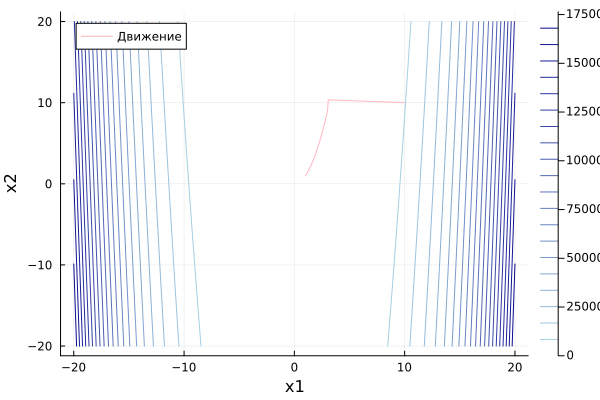

In [16]:
init = [10.0, 10.0]
trajectory = davidon_fletcher_paull(init, 0.01, 0.001)
x_min = trajectory[end]
println("Метод Дэвидона-Флетчера-Пауэлла:\n точка минимума: $x_min\n кол-во итераций = $(length(trajectory)-1)")

contour_range = -20:0.1:20
contour_plot = contour(contour_range, contour_range, (x, y) -> (1-x)^2+100(y-x^2)^2, levels=20, c=:blues)
plot!([point[1] for point in trajectory], [point[2] for point in trajectory], label="Движение", c=:reds)
plot!(xlabel="x1", ylabel="x2")

Метод Дэвидона-Флетчера-Пауэлла:
 точка минимума: [0.9999999729019698, 0.9999999066656021]
 кол-во итераций = 11


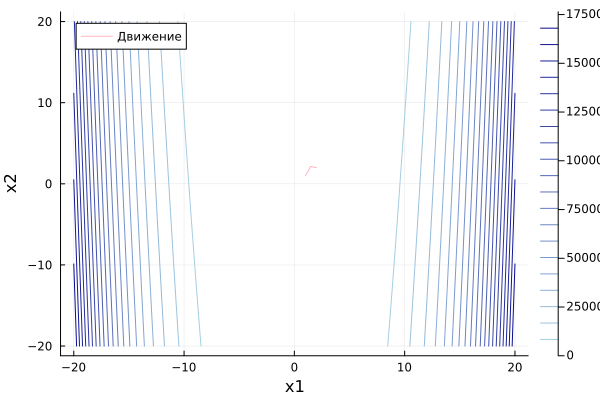

In [17]:
init = [2.0, 2.0]
trajectory = davidon_fletcher_paull(init, 0.01, 0.001)
x_min = trajectory[end]
println("Метод Дэвидона-Флетчера-Пауэлла:\n точка минимума: $x_min\n кол-во итераций = $(length(trajectory)-1)")

contour_range = -20:0.1:20
contour_plot = contour(contour_range, contour_range, (x, y) -> (1-x)^2+100(y-x^2)^2, levels=20, c=:blues)
plot!([point[1] for point in trajectory], [point[2] for point in trajectory], label="Движение", c=:reds)
plot!(xlabel="x1", ylabel="x2")